# Regularization in Linear Regression
Estimated time needed: 30 minutes

Objectives
After completing this lab you will be able to:

Implement, evaluate, and compare the performance of three regularization techniques for linear regression
Analyze the effect of simple linear regularization when modelling on noisy data with and without outliers
Use Lasso regularization to reduce the number of features for subsequent multiple linear regression modelling

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split

In [19]:
def regression_result(yPred, yTrue, regressionType):
    MAE = mean_absolute_error(yPred, yTrue)
    MSE = mean_squared_error(yPred, yTrue)
    R2 = r2_score(yPred, yTrue)
    VS = explained_variance_score(yPred, yTrue)

    print(f"Results of {regressionType} regression")
    print("MAE", round(MAE, 4))
    print("MSE", round(MSE, 4))
    print("RMSE", round(np.sqrt(MSE)))
    print("R2-Score", round(R2, 4))
    print("Explained Variance Score", round(VS, 4))

## Generate a simple dataset with one feature

In [30]:
noise = 1
np.random.seed(42)
X = 2 * np.random.rand(1000,1)
y = 4 + 3 * X + noise * np.random.randn(1000,1)
y_ideal = 4 + 3 * X
y_outlier = pd.Series(y.reshape(-1).copy())

# Identify indices where the feature variable X is greater than a certain threshold
threshold = 1.5  # Example threshold to add outliers for larger feature values
outlier_indices = np.where(X.flatten() > threshold)[0]

# Add outliers at random locations within the specified portion
num_outliers = 5  # Number of outliers to add
selected_indices = np.random.choice(outlier_indices, num_outliers, replace=False)

# Modify the target values at these indices to create outliers (add significant noise)
y_outlier[selected_indices] += np.random.uniform(50, 100, num_outliers)

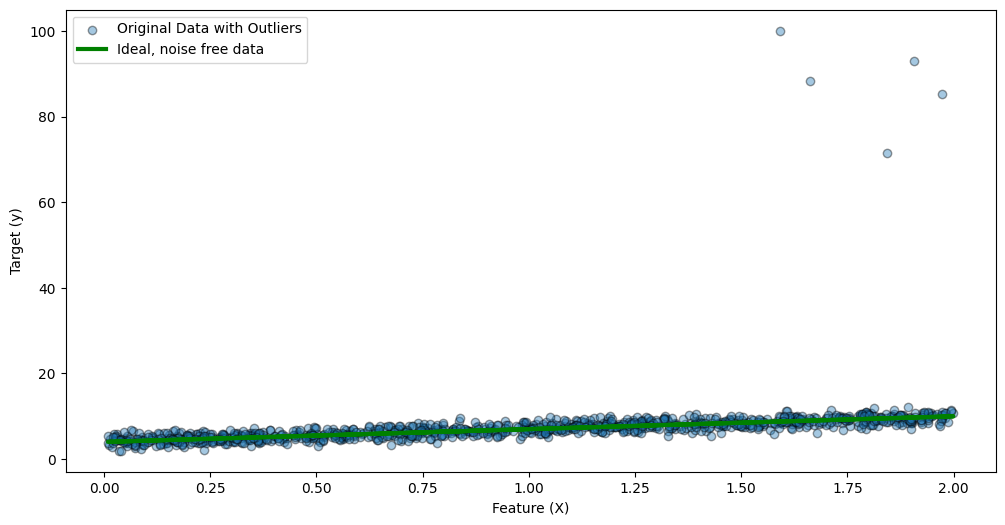

In [25]:
plt.figure(figsize=(12, 6))

# Scatter plot of the original data with outliers
plt.scatter(X, y_outlier, alpha=0.4,ec='k', label='Original Data with Outliers')
plt.plot(X, y_ideal,  linewidth=3, color='g',label='Ideal, noise free data')

plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.title('')
plt.legend()
plt.show()

## Fit Ordinary, Ridge, and Lasso regression models and use them to make predicitions on the original, outlier-free data¶

In [34]:
linear = LinearRegression()
linear.fit(X, y_outlier)
linearPred = linear.predict(X)

lasso = Lasso(alpha=1)
lasso.fit(X, y_outlier)
lassoPred = lasso.predict(X)

ridge = Ridge(alpha=0.2)
ridge.fit(X, y_outlier)
ridgePred = ridge.predict(X)

In [35]:
regression_result(y_outlier, linearPred,'linear')
regression_result(y_outlier, lassoPred, 'lasso')
regression_result(y_outlier, ridgePred, 'ridge')

Results of linear regression
MAE 1.3258
MSE 31.5886
RMSE 6
R2-Score 0.1376
Explained Variance Score 0.1376
Results of lasso regression
MAE 1.6907
MSE 34.5208
RMSE 6
R2-Score 0.0575
Explained Variance Score 0.0575
Results of ridge regression
MAE 1.3253
MSE 31.5886
RMSE 6
R2-Score 0.1376
Explained Variance Score 0.1376


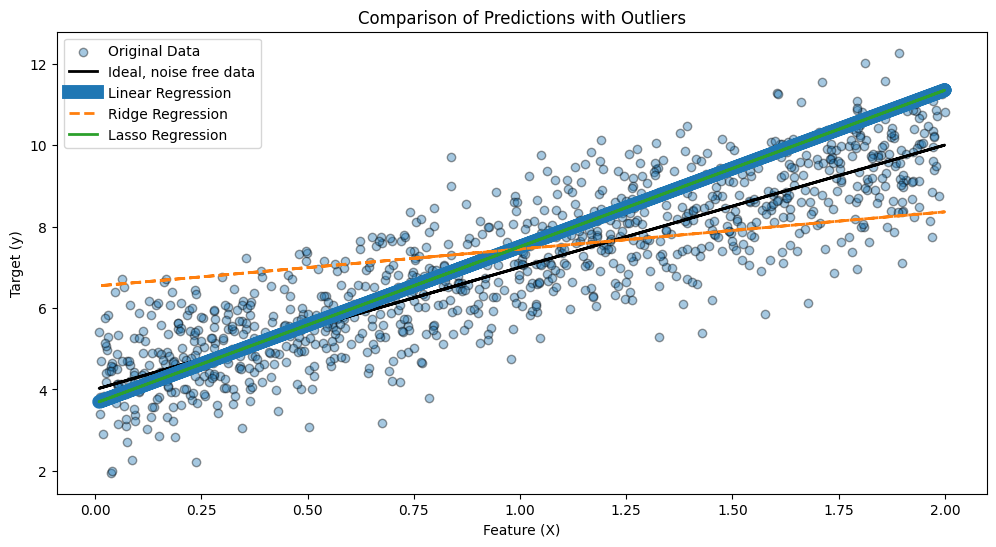

In [36]:
plt.figure(figsize=(12, 6))

# Scatter plot of the original data with outliers
plt.scatter(X, y, alpha=0.4,ec='k', label='Original Data')

# Plot the ideal regression line (noise free data)
plt.plot(X, y_ideal,  linewidth=2, color='k',label='Ideal, noise free data')

# Plot predictions from the simple linear regression model
plt.plot(X, linearPred,  linewidth=10, label='Linear Regression')

# Plot predictions from the ridge regression model
plt.plot(X, lassoPred, linestyle='--', linewidth=2, label='Ridge Regression')

# Plot predictions from the lasso regression model
plt.plot(X, ridgePred,  linewidth=2, label='Lasso Regression')

plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.title('Comparison of Predictions with Outliers')
plt.legend()
plt.show()

Exercise 2. Build the models and the prediction plots from the same data, excluding the outliers¶
練習 2. 從相同的資料建立模型和預測圖，排除異常值¶

Results of Ordinary regression
MAE 0.7873
MSE 0.975
RMSE 1
R2-Score 0.7492
Explained Variance Score 0.7492
Results of Ridge regression
MAE 0.7874
MSE 0.975
RMSE 1
R2-Score 0.7492
Explained Variance Score 0.7492
Results of Lasso regression
MAE 0.8408
MSE 1.0923
RMSE 1
R2-Score 0.7191
Explained Variance Score 0.7191


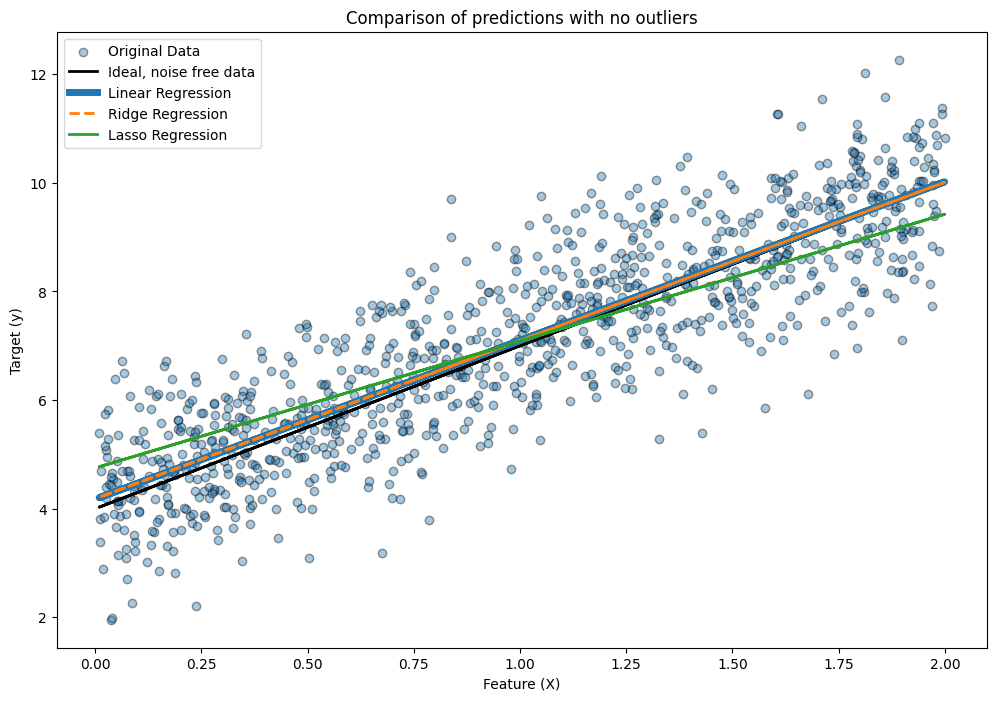

In [29]:
# Fit a simple linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred_lin = lin_reg.predict(X)

# Fit a ridge regression model (regularization to control large coefficients)
ridge_reg = Ridge(alpha=1)
ridge_reg.fit(X, y)
y_pred_ridge = ridge_reg.predict(X)

# Fit a lasso regression model (regularization to control large coefficients)
lasso_reg = Lasso(alpha=0.2)
lasso_reg.fit(X, y)
y_pred_lasso = lasso_reg.predict(X)

# Print the regression results
regression_result(y, y_pred_lin, 'Ordinary')
regression_result(y, y_pred_ridge, 'Ridge')
regression_result(y, y_pred_lasso, 'Lasso')


# Plot the data and the predictions
plt.figure(figsize=(12, 8))

# # Scatter plot of the original data
plt.scatter(X, y, alpha=0.4,ec='k', label='Original Data')

# Plot the ideal regression line (noise free data)
plt.plot(X, y_ideal,  linewidth=2, color='k',label='Ideal, noise free data')

# Plot predictions from the simple linear regression model
plt.plot(X, y_pred_lin,  linewidth=5, label='Linear Regression')

# Plot predictions from the ridge regression model
plt.plot(X, y_pred_ridge, linestyle='--',linewidth=2, label='Ridge Regression')

# Plot predictions from the lasso regression model
plt.plot(X, y_pred_lasso,  linewidth=2, label='Lasso Regression')

plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
# plt.ylim((0,20))
plt.title('Comparison of predictions with no outliers')
plt.legend()
plt.show()

## Create a high dimensional synthetic dataset with a small number of informative features using make_regression¶

In [39]:
from sklearn.datasets import make_regression

X, y, ideal_coefficients = make_regression(n_samples=100, n_features=100, n_informative=10, noise=10, random_state=42, coef=True)

ideal_prediction = X @ ideal_coefficients ## 無雜訊

X_train, X_test, y_train, y_test, ideal_train, ideal_test = train_test_split(X, y,ideal_prediction, test_size=0.3, random_state=42)



In [40]:
lasso = Lasso(alpha=0.1)
ridge = Ridge(alpha=1.0)
linear = LinearRegression()

# Fit the models
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)
linear.fit(X_train, y_train)

# Predict on the test set
y_pred_linear = linear.predict(X_test)
y_pred_ridge = ridge.predict(X_test)
y_pred_lasso = lasso.predict(X_test)

In [42]:
regression_result(y_test, y_pred_linear, 'linear')
regression_result(y_test, y_pred_lasso, 'lasso')
regression_result(y_test, y_pred_ridge, 'ridge')

Results of linear regression
MAE 77.7353
MSE 9844.2714
RMSE 99
R2-Score 0.4018
Explained Variance Score 0.4354
Results of lasso regression
MAE 13.8855
MSE 304.644
RMSE 17
R2-Score 0.9815
Explained Variance Score 0.9815
Results of ridge regression
MAE 76.9622
MSE 9744.4693
RMSE 99
R2-Score 0.4079
Explained Variance Score 0.4446


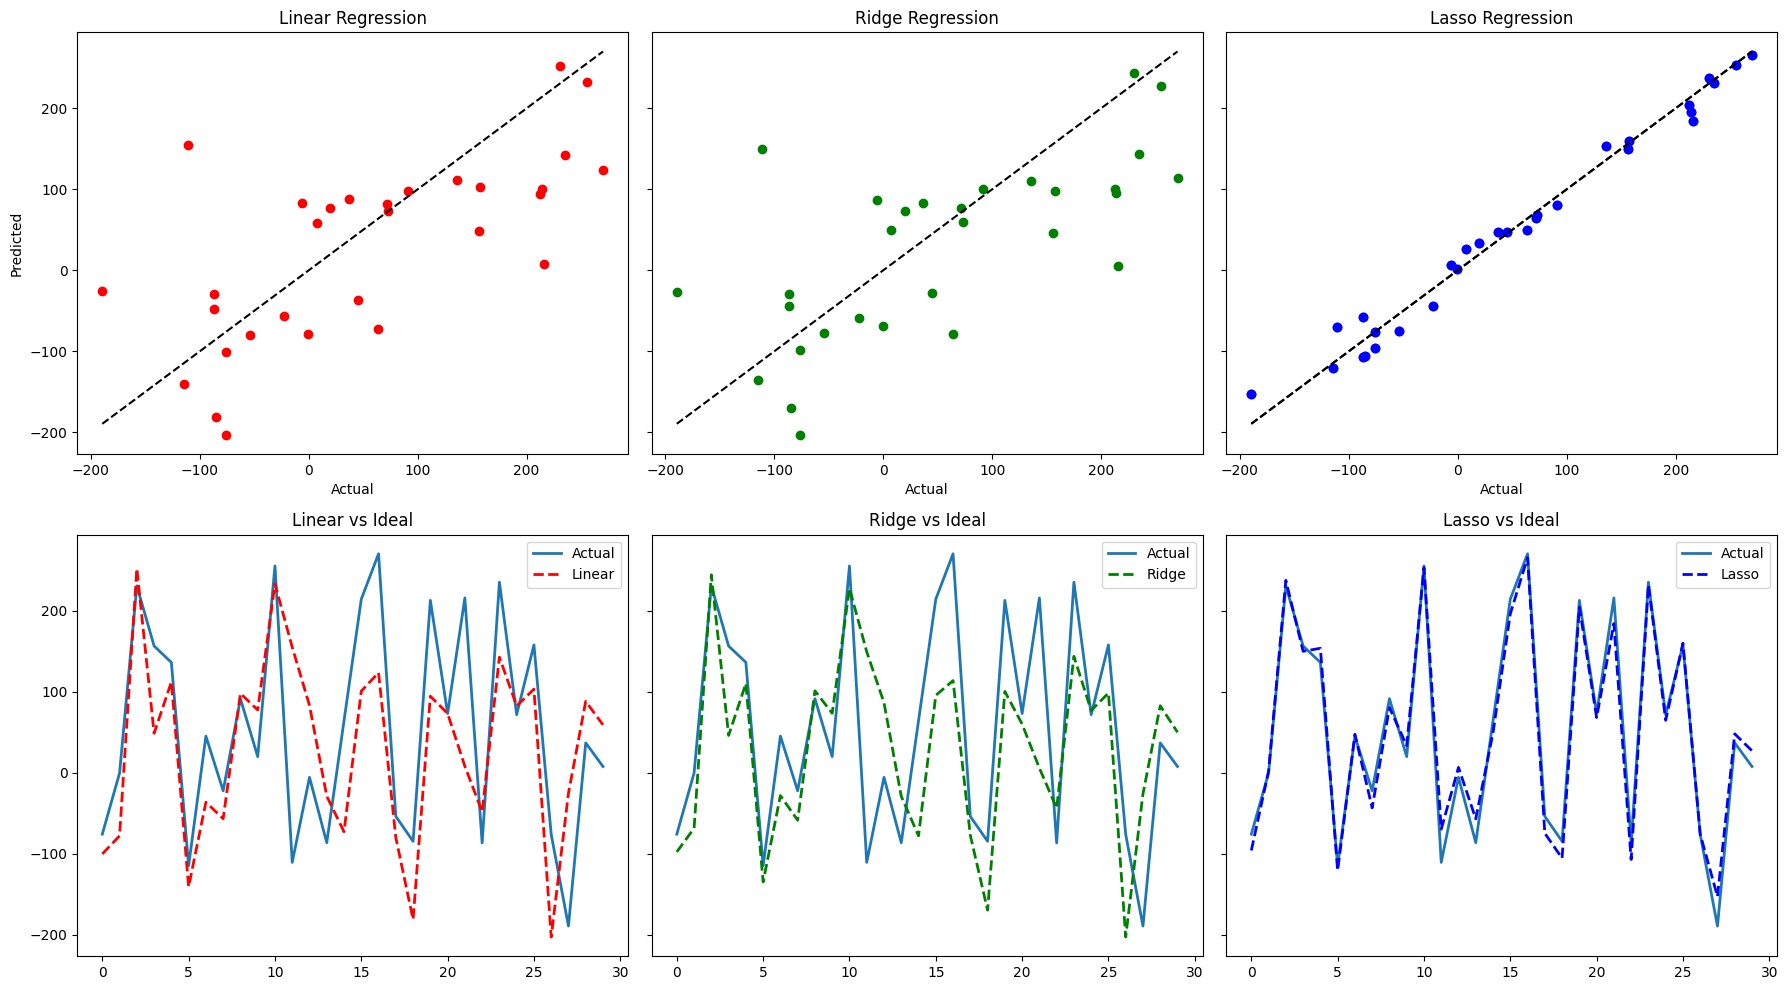

In [43]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharey=True)

axes[0,0].scatter(y_test, y_pred_linear, color="red", label="Linear")
axes[0,0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
axes[0,0].set_title("Linear Regression")
axes[0,0].set_xlabel("Actual",)
axes[0,0].set_ylabel("Predicted",)

axes[0,2].scatter(y_test, y_pred_lasso, color="blue", label="Lasso")
axes[0,2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
axes[0,2].set_title("Lasso Regression",)
axes[0,2].set_xlabel("Actual",)

axes[0,1].scatter(y_test, y_pred_ridge, color="green", label="Ridge")
axes[0,1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
axes[0,1].set_title("Ridge Regression",)
axes[0,1].set_xlabel("Actual",)

axes[0,2].scatter(y_test, y_pred_lasso, color="blue", label="Lasso")
axes[0,2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
axes[0,2].set_title("Lasso Regression",)
axes[0,2].set_xlabel("Actual",)


# Line plots for predictions compared to actual and ideal predictions
axes[1,0].plot(y_test, label="Actual", lw=2)
axes[1,0].plot(y_pred_linear, '--', lw=2, color='red', label="Linear")
axes[1,0].set_title("Linear vs Ideal",)
axes[1,0].legend()
 
axes[1,1].plot(y_test, label="Actual", lw=2)
# axes[1,1].plot(ideal_test, '--', label="Ideal", lw=2, color="purple")
axes[1,1].plot(y_pred_ridge, '--', lw=2, color='green', label="Ridge")
axes[1,1].set_title("Ridge vs Ideal",)
axes[1,1].legend()
 
axes[1,2].plot(y_test, label="Actual", lw=2)
axes[1,2].plot(y_pred_lasso, '--', lw=2, color='blue', label="Lasso")
axes[1,2].set_title("Lasso vs Ideal",)
axes[1,2].legend()
 
plt.tight_layout()
plt.show()

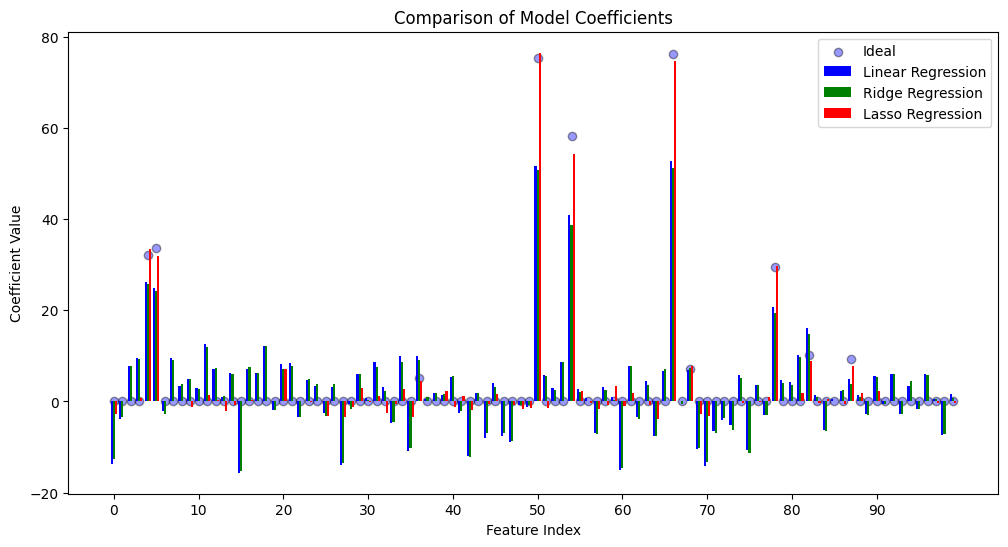

In [45]:
# Model coefficients
linear_coeff = linear.coef_
ridge_coeff = ridge.coef_
lasso_coeff = lasso.coef_


# Plot the coefficients
x_axis = np.arange(len(linear_coeff))
x_labels = np.arange(min(x_axis),max(x_axis),10)
plt.figure(figsize=(12, 6))

plt.scatter(x_axis, ideal_coefficients,  label='Ideal', color='blue', ec='k', alpha=0.4)
plt.bar(x_axis - 0.25, linear_coeff, width=0.25, label='Linear Regression', color='blue')
plt.bar(x_axis, ridge_coeff, width=0.25, label='Ridge Regression', color='green')
plt.bar(x_axis + 0.25, lasso_coeff, width=0.25, label='Lasso Regression', color='red')

plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('Comparison of Model Coefficients')
plt.xticks(x_labels)
plt.legend()
plt.show()